In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("refactored_foods.csv")
df = df.iloc[:841,:]
df

,image nr,Description,Food classification,"Complexity (amount, number of items)",Natural vs transformed,Sweet vs savory,State of food,Food vs nonfood,FPC,S,...,Average_Health_JP,St._dev_Health_JP,Average_Desire_ALL,St_dev_Desire_ALL,Average_Desire_UK,St_dev_Desire_UK,Average_Desire_US,St_dev_Desire_US,Average_Desire_JP,St_dev_Desire_JP
0,1,Oranges,Universal,2,Natural,Sweet,Raw,Food,0.2439,4.6617,...,80.47,12.07,65.09,26.50,63.73,27.00,65.85,29.62,65.38,22.61
1,2,Apples,Universal,3,Natural,Sweet,Raw,Food,0.3338,5.0094,...,74.32,19.22,63.08,28.46,61.32,27.19,69.23,29.35,59.06,28.88
2,3,Apple + parts,Universal,12,Natural,Sweet,Raw,Food,0.4168,4.9397,...,81.77,17.19,67.19,25.45,65.29,23.37,70.29,25.22,65.09,27.61
3,4,Appleparts,Universal,11,Natural,Sweet,Raw,Food,0.3115,4.7412,...,79.14,14.95,63.19,30.16,60.31,32.57,66.58,30.27,63.22,27.77
4,5,Grasshopper,Unappealing,50,Natural,Savory,NaN,Food,0.3107,4.9059,...,47.59,29.74,13.11,21.99,14.66,25.69,18.79,26.14,6.29,9.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,837,pepernoten (gingernuts) - large portion,Western,NaN,NaN,NaN,NaN,Food,0.5194,4.8716,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,838,candied orange parts,Western,NaN,NaN,NaN,NaN,Food,0.2015,4.6495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838,839,candied lemon parts,Western,NaN,NaN,NaN,NaN,Food,0.2236,4.6280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
839,840,candied orange and lemon parts,Western,NaN,NaN,NaN,NaN,Food,0.2320,4.6863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.drop('image nr', axis=1)

df = df[df['Food vs nonfood'] == "Food"]
df = df.drop('Food vs nonfood', axis=1)
df = df.drop('State of food', axis=1)
df = df[df['Food classification'] != 'Unappealing']
df = df[df['Food classification'] !=  'African']
#df = df.dropna(subset=['S'],how='all')
df.reset_index(drop=True,inplace=True)
#df = df.iloc[:,0:27]
df['Food classification'].value_counts()

Asian        301
Western      211
Universal    157
Name: Food classification, dtype: int64

In [4]:
def standardize_classification(item):
    if (not isinstance(item, str)) and (math.isnan(float(item))):
        return item
    elif item == "Universal":
        return 0
    elif item == "Western":
        return 1
    elif item == "Asian":
        return 2

def standardize_natural(item):
    if (not isinstance(item, str)) and (math.isnan(float(item))):
        return item
    elif item == "Natural":
        return 1
    else:
        return 0
    
def standardize_flavor(item):
    if (not isinstance(item, float)) and (not isinstance(item, str)) and (math.isnan(float(item))):
        return item
    elif item == "Savory":
        return 1
    else:
        return 0
    
def standardize_complexity(item):
    if (not isinstance(item, str)) and (math.isnan(float(item))):
        return item
    elif (item == "Complex") or (item == "complex"):
        return 10
    elif (int(item) >= 10):
        return 10
    else:
        return item

In [5]:
df['Food classification'] = df['Food classification'].apply(lambda x: standardize_classification(x))
df['Natural vs transformed'] = df['Natural vs transformed'].apply(lambda x: standardize_natural(x))
df['Sweet vs savory'] = df['Sweet vs savory'].apply(lambda x: standardize_flavor(x))
df['Complexity (amount, number of items)'] = df['Complexity (amount, number of items)'].apply(lambda x: standardize_complexity(x))
df

,Description,Food classification,"Complexity (amount, number of items)",Natural vs transformed,Sweet vs savory,FPC,S,P,C,E,...,Average_Health_JP,St._dev_Health_JP,Average_Desire_ALL,St_dev_Desire_ALL,Average_Desire_UK,St_dev_Desire_UK,Average_Desire_US,St_dev_Desire_US,Average_Desire_JP,St_dev_Desire_JP
0,Oranges,0,2,1.0,0,0.2439,4.6617,63.8553,0.0240,0.3480,...,80.47,12.07,65.09,26.50,63.73,27.00,65.85,29.62,65.38,22.61
1,Apples,0,3,1.0,0,0.3338,5.0094,65.4004,0.0410,0.3381,...,74.32,19.22,63.08,28.46,61.32,27.19,69.23,29.35,59.06,28.88
2,Apple + parts,0,10,1.0,0,0.4168,4.9397,66.8784,0.0567,0.3492,...,81.77,17.19,67.19,25.45,65.29,23.37,70.29,25.22,65.09,27.61
3,Appleparts,0,10,1.0,0,0.3115,4.7412,66.0402,0.0433,0.3878,...,79.14,14.95,63.19,30.16,60.31,32.57,66.58,30.27,63.22,27.77
4,Crostini,1,1,0.0,1,0.1735,4.5275,68.3825,0.0502,0.3765,...,33.31,22.19,28.19,26.71,33.91,33.47,21.20,19.05,29.92,25.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,pepernoten (gingernuts) - large portion,1,NaN,NaN,0,0.5194,4.8716,69.7927,0.0849,0.2669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665,candied orange parts,1,NaN,NaN,0,0.2015,4.6495,68.2387,0.0442,0.3530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666,candied lemon parts,1,NaN,NaN,0,0.2236,4.6280,67.1906,0.0418,0.3690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
667,candied orange and lemon parts,1,NaN,NaN,0,0.2320,4.6863,67.3786,0.0420,0.3535,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
temp = df.dropna()
temp = temp.drop('Description', axis=1)
model = LogisticRegression()

for i in range(0,5):

    X = temp.drop(columns=['Food classification'])
    Y = temp['Food classification']
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

    model.fit(x_train, y_train)
    print("Accuracy of LR Model: ", model.score(x_test, y_test))


Accuracy of LR Model:  0.7552447552447552
Accuracy of LR Model:  0.7342657342657343
Accuracy of LR Model:  0.7692307692307693
Accuracy of LR Model:  0.7762237762237763
Accuracy of LR Model:  0.7482517482517482


In [7]:
model = LogisticRegression()

for i in range(0,5):

    X = temp.drop(columns=['Food classification'])
    Y = temp['Food classification']
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

    model.fit(x_train, y_train)
    print("Accuracy of LR Model: ", model.score(x_test, y_test))

array([[ 2.        ,  1.        ,  0.        , ..., 29.62      ,
        65.38      , 22.61      ],
       [ 3.        ,  1.        ,  0.        , ..., 29.35      ,
        59.06      , 28.88      ],
       [10.        ,  1.        ,  0.        , ..., 25.22      ,
        65.09      , 27.61      ],
       ...,
       [ 7.1794205 ,  0.36834085,  0.        , ..., 23.82049339,
        63.68443352, 19.37274418],
       [-3.16420458, -0.45811514,  0.        , ..., 30.93975713,
        39.01861464, 14.62772517],
       [10.        ,  0.        ,  1.        , ..., 26.8563148 ,
        34.92605234, 15.1751356 ]])

In [9]:
#df2[df2.isnull().any(axis=1)]

temp = df
temp = df[df['Average_Health_JP'].notna() & df['St._dev_Health_JP'].notna()]
temp

#nah = df[df.isnull().any(axis=1)]
#nah

imp = IterativeImputer(max_iter=2, n_nearest_features=10, sample_posterior=True, random_state=0)
imp.fit(temp.iloc[:,2:])
#test = df.iloc[478:, 5:]
idk = imp.transform(df.iloc[:,2:])
#idk

In [8]:
df2 = pd.DataFrame(idk)
classif = df["Food classification"]
df2.insert(0, 'Food classification', classif)

df2.iloc[:,2] = df2.loc[:,2].apply(lambda x: round(abs(x)))

In [9]:
for i in range(0,5):

    X = df2.drop(columns=['Food classification'])
    Y = df2['Food classification']
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

    model.fit(x_train, y_train)
    
    print("Accuracy of LR Model: ", model.score(x_test, y_test))



Accuracy of LR Model:  0.6865671641791045
Accuracy of LR Model:  0.6766169154228856
Accuracy of LR Model:  0.6666666666666666
Accuracy of LR Model:  0.6766169154228856
Accuracy of LR Model:  0.6766169154228856


In [10]:
y_pred = model.predict(x_test)

probs_y = model.predict_proba(x_test)
probs_y = np.round(probs_y, 2)

pred_perc = pd.DataFrame(probs_y)
pred_perc.columns = ['Universal%', 'Western%', 'Asian%']

display(pred_perc)
display(pd.DataFrame(y_test))

,Universal%,Western%,Asian%
0,0.27,0.12,0.61
1,0.01,0.01,0.99
2,0.65,0.22,0.13
3,0.45,0.48,0.07
4,0.22,0.34,0.43
...,...,...,...
196,0.25,0.70,0.06
197,0.01,0.04,0.95
198,0.07,0.09,0.84
199,0.00,0.02,0.98


,Food classification
487,1
319,2
634,0
231,1
666,1
...,...
133,1
466,2
619,0
330,2


In [11]:
for i in range(0,5):

    X = df2.drop(columns=['Food classification'])
    Y = df2['Food classification']
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

    model.fit(x_train, y_train)
    
    print("Accuracy of LR Model: ", model.score(x_test, y_test))

In [12]:
X = df2.transpose()
pca = PCA(n_components=2)
pca.fit(X)
pca.components_
pcaDf = pd.DataFrame(pca.components_).transpose()
pcaDf

0         1
0    0.034171  0.059834
1    0.068010 -0.013599
2    0.063660 -0.000262
3    0.055241  0.013089
4    0.038762 -0.011749
..        ...       ...
664  0.023091  0.046227
665  0.036660  0.016855
666  0.035727  0.015682
667  0.051951 -0.017514
668 -0.017558  0.105286

[201 rows x 3 columns]

,Food classification
10,1
451,2
582,1
317,2
447,2
...,...
450,2
542,0
517,2
107,0


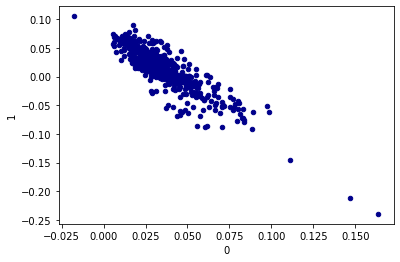

In [13]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(pcaDf)
pcaDf.plot.scatter(x=0, y=1, c='DarkBlue')
kmeans.cluster_centers_